In [1]:
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
from tang_jcompneuro.model_fitting_postprocess import load_data_generic

In [3]:
def check_all(squared, score_col_name):
    models_to_examine = [
        ('gabor', 'simple'),
        ('gabor', 'complex'),
        ('gabor', 'multi,1,1'),
        ('gabor', 'single', True, False, ('simple', 'complex')),
    ]
    
    
    return load_data_generic(models_to_examine, load_naive=False, metric='ccnorm_5', squared=squared,
                            score_col_name=score_col_name,
                            datasets_to_check=('MkA_Shape',
                                               'MkE2_Shape'
                                              ),
                      subsets_to_check=('all',
                                        'OT'
                                       ), modelname_alternative=lambda _1, x, _2, _3: x)


In [4]:
df_all_cc2 = check_all(squared=True, score_col_name='cc2').xs(100, level='percentage').sort_index()

MkA_Shape all
MkA_Shape OT
MkE2_Shape all
MkE2_Shape OT


In [5]:
HO_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['HO']['mean'], axis=1).unstack('subset')
HO_neuron_perf

subset                      OT       all
dataset    model                        
MkA_Shape  complex    0.196395  0.155822
           multi,1,1  0.186224  0.225227
           simple     0.135204  0.159118
           single     0.198271  0.193126
MkE2_Shape complex    0.193234  0.168861
           multi,1,1  0.178395  0.230079
           simple     0.116399  0.155465
           single     0.185540  0.187925

In [6]:
OT_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['OT']['mean'], axis=1).unstack('subset')
OT_neuron_perf

subset                      OT       all
dataset    model                        
MkA_Shape  complex    0.341311  0.239228
           multi,1,1  0.355975  0.312663
           simple     0.216447  0.205305
           single     0.348582  0.273292
MkE2_Shape complex    0.370702  0.276991
           multi,1,1  0.378517  0.352416
           simple     0.237685  0.221754
           single     0.366850  0.299665

In [7]:
# show complex vs multi,1,1
# show simple vs multi,1,1
# show single vs multi,1,1

In [8]:
from tang_jcompneuro.plotting import image_subset_and_neuron_subset_list, show_one_basic
# magic numbers here follow
# https://github.com/leelabcnbc/tang_jcompneuro/blob/master/thesis_plots/v1_fitting/results_glm_opt_detailed.ipynb
def draw_one_stuff(monkey, model_name_x, model_name_y, save=None):
    # draw one by one.
    num_panel = len(image_subset_and_neuron_subset_list)
    
    plt.close('all')
    fig, axes = plt.subplots(1, num_panel, sharex=True, sharey=True, squeeze=False,
                            figsize=(5.5,2.5))
    for idx, (ax, (img_subset, neuron_subset)) in enumerate(zip(axes.ravel(), image_subset_and_neuron_subset_list)):
        data_x = df_all_cc2.at[(monkey, img_subset, model_name_x), 'cc2'][neuron_subset]['raw']
        data_y = df_all_cc2.at[(monkey, img_subset, model_name_y), 'cc2'][neuron_subset]['raw']
        print(data_x.min(), data_x.max())
        print(data_y.min(), data_y.max())
        show_one_basic(data_x, data_y, title=f'{neuron_subset} neurons\n{img_subset} stimuli',
                      ax=ax,mean_title='mean $CC_\mathrm{norm}^2$', xlabel=model_name_x,
                      ylabel=model_name_y  if idx == 0 else None)
    monkey_title = {'MkA_Shape': 'A', 'MkE2_Shape': 'B'}[monkey]
    fig.suptitle(f'{model_name_y} vs. {model_name_x} on monkey {monkey_title}')
    # adjust figure 
    fig.subplots_adjust(top=0.75, bottom=0.175, left=0.1, right=0.98, hspace=0.1, wspace=0.075)
    
#     if save is not None:
#         save_dir = os.path.join(dir_dictionary['plots'], 'supp', 'cnn_different_arch')
#         os.makedirs(save_dir, exist_ok=True)
#         fig.savefig(os.path.join(save_dir, f'{save}.pdf'), dpi=300)
    
    plt.show()
    

3.99944054608e-05 0.997136811389
0.00145350978755 1.14123427367
4.77606755218e-05 0.726233852693
0.00609077055425 0.740845669016
4.29586950046e-05 0.763719658949
0.000174007529989 0.770545204839


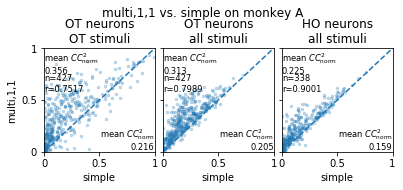

In [9]:
draw_one_stuff('MkA_Shape', 'simple', 'multi,1,1')

0.000986306036507 0.946716325238
0.00145350978755 1.14123427367
0.00554932705721 0.610931046221
0.00609077055425 0.740845669016
0.00417982188562 0.521553432945
0.000174007529989 0.770545204839


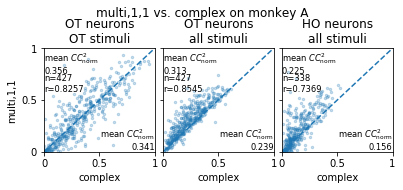

In [10]:
draw_one_stuff('MkA_Shape', 'complex', 'multi,1,1')

3.99944054608e-05 0.997136811389
0.00145350978755 1.14123427367
4.77606755218e-05 0.726233852693
0.00609077055425 0.740845669016
4.29586950046e-05 0.763719658949
0.000174007529989 0.770545204839


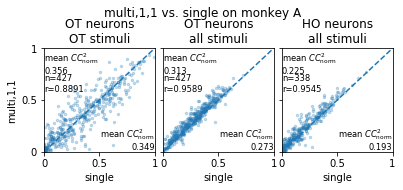

In [11]:
draw_one_stuff('MkA_Shape', 'single', 'multi,1,1')